In [1]:
import numpy as np
import math
import cv2
from matplotlib import pyplot as plt

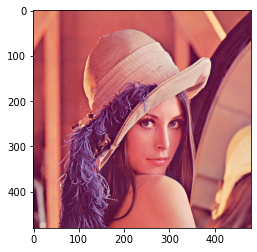

In [2]:
img = cv2.imread("image.png")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# 1 Найти лицо на изображении

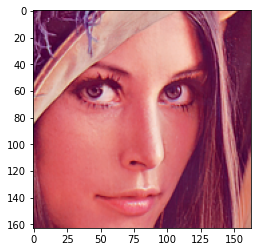

In [3]:
cascadePath = "haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cascadePath)
faces = faceCascade.detectMultiScale(img)
x, y, w, h = faces[0]
detected_face_img = img[y : y + h, x : x + w]
    
plt.imshow(cv2.cvtColor(detected_face_img, cv2.COLOR_BGR2RGB))


# 2 Отступ от границ

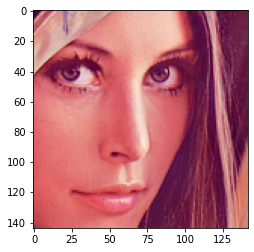

In [4]:
img = detected_face_img[math.ceil(0.1 * y):math.ceil(0.9 * y), math.ceil(0.1 * x):math.ceil(0.9 * x), :]
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# 3 Получение бинарного изображения краев

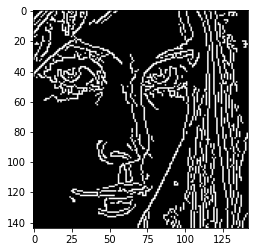

In [5]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 50, 100, 3);
plt.imshow(edges, cmap="gray")

# 4 Удаление мелких границ

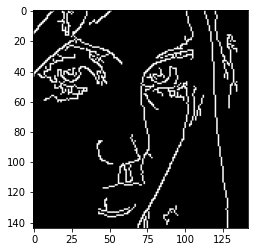

In [6]:
contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
new_contoures = []
for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    if w >= 10 and h >= 10:
        new_contoures.append(c)
maskk = np.zeros_like(edges)
cv2.drawContours(maskk, new_contoures, -1, (255, 255, 255), cv2.FILLED)
edges = cv2.bitwise_and(edges, edges, mask = maskk)
plt.imshow(edges, cmap="gray")

# 5 Морфологическая операция наращивания

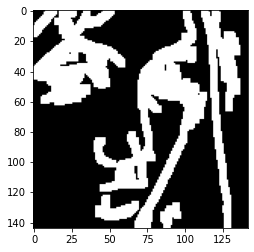

In [7]:
structuring_element = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
dilatation = cv2.dilate(edges, structuring_element)
plt.imshow(dilatation, cmap="gray")

# 6 Сглаживание с помощью фильтра Гаусса. Получение нормированного изображения

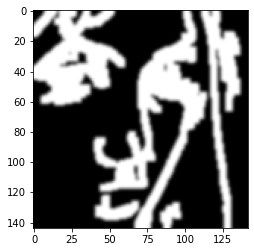

In [8]:
gauss = cv2.GaussianBlur(dilatation, (5, 5), 0)
plt.imshow(gauss, cmap="gray")

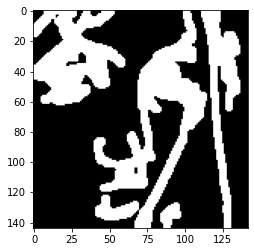

In [9]:
dst = np.zeros_like(gauss)
normalize_img = cv2.normalize(gauss, dst, 1, 0, cv2.NORM_INF)
plt.imshow(normalize_img, cmap="gray")

# 7 Лицо с билатеральной фильтрацией

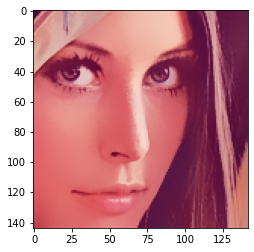

In [10]:
f1 = cv2.bilateralFilter(img, 20, 40, 10) 
plt.imshow(cv2.cvtColor(f1, cv2.COLOR_BGR2RGB))

# 8 Лицо с улучшенной контрастностью

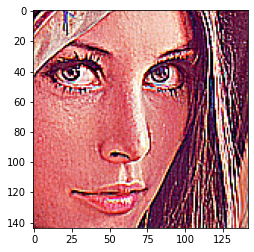

In [11]:
sharp = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
f2 = cv2.filter2D(img, -1, sharp)
plt.imshow(cv2.cvtColor(f2, cv2.COLOR_BGR2RGB))

# 9 Финальная фильтрация

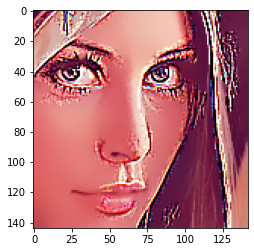

In [12]:
normalize_img = np.expand_dims(normalize_img, axis=2)
result_img = normalize_img * f2 + (1 - normalize_img) * f1
plt.imshow(cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB))